In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [12]:
df_events=pd.read_csv('ged201.csv' ,dtype={'gwnoa': object})

In [13]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225385 entries, 0 to 225384
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 225385 non-null  int64  
 1   relid              225385 non-null  object 
 2   year               225385 non-null  int64  
 3   active_year        225385 non-null  int64  
 4   code_status        225385 non-null  object 
 5   type_of_violence   225385 non-null  int64  
 6   conflict_dset_id   225385 non-null  int64  
 7   conflict_new_id    225385 non-null  int64  
 8   conflict_name      225385 non-null  object 
 9   dyad_dset_id       225385 non-null  int64  
 10  dyad_new_id        225385 non-null  int64  
 11  dyad_name          225385 non-null  object 
 12  side_a_dset_id     225385 non-null  int64  
 13  side_a_new_id      225385 non-null  int64  
 14  side_a             225385 non-null  object 
 15  side_b_dset_id     225385 non-null  int64  
 16  si

In [14]:
print(f'{len(df_events.latitude)/len (df_events)*100}%')

100.0%


In [15]:
print(f'{len(df_events.longitude)/len (df_events)*100}%')


100.0%


In [17]:
serie_noNan=df_events.isna().sum()==0

In [18]:
df_nonNan=pd.DataFrame(serie_noNan, columns=['valid'])

In [19]:
df_nonNan.index

Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob'],
      dtype='object')

In [20]:
df_nonNan = df_nonNan[df_nonNan.valid==True]

In [21]:
df_nonNan.index

Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'where_prec', 'where_coordinates', 'latitude', 'longitude', 'geom_wkt',
       'priogrid_gid', 'country', 'country_id', 'region', 'event_clarity',
       'date_prec', 'date_start', 'date_end', 'deaths_a', 'deaths_b',
       'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low'],
      dtype='object')

In [22]:
df_dataset= df_events[df_nonNan.index]

In [23]:
df_dataset

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,...,1,2017-07-31 00:00:00.000,2017-07-31 00:00:00.000,0,4,0,2,6,6,6
1,132140,AFG-1989-1-411-2,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,3,1989-01-07 00:00:00.000,1989-01-13 00:00:00.000,6,0,0,0,6,6,6
2,130364,AFG-1989-1-411-37,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,2,1989-01-15 00:00:00.000,1989-01-18 00:00:00.000,0,0,0,4,4,4,0
3,130359,AFG-1989-1-411-4,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,2,1989-01-23 00:00:00.000,1989-01-24 00:00:00.000,0,0,0,600,600,600,600
4,133883,AFG-1989-1-411-39,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,3,1989-01-30 00:00:00.000,1989-02-05 00:00:00.000,0,0,0,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225380,15525,MZM-1989-3-1347-4,1989,1,Clear,3,498,562,Renamo - Civilians,498,...,3,1989-03-18 00:00:00.000,1989-03-24 00:00:00.000,0,0,9,0,9,9,9
225381,15524,MZM-1989-3-1347-16,1989,1,Clear,3,498,562,Renamo - Civilians,498,...,3,1989-07-09 00:00:00.000,1989-07-15 00:00:00.000,0,0,9,0,9,9,9
225382,15245,MZM-1990-3-1347-18,1990,1,Clear,3,498,562,Renamo - Civilians,498,...,2,1990-06-07 00:00:00.000,1990-06-10 00:00:00.000,0,0,7,0,7,7,7
225383,15516,MZM-1990-3-1347-28,1990,1,Clear,3,498,562,Renamo - Civilians,498,...,3,1990-11-17 00:00:00.000,1990-11-23 00:00:00.000,0,0,1,0,1,1,1


In [24]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225385 entries, 0 to 225384
Data columns (total 39 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 225385 non-null  int64  
 1   relid              225385 non-null  object 
 2   year               225385 non-null  int64  
 3   active_year        225385 non-null  int64  
 4   code_status        225385 non-null  object 
 5   type_of_violence   225385 non-null  int64  
 6   conflict_dset_id   225385 non-null  int64  
 7   conflict_new_id    225385 non-null  int64  
 8   conflict_name      225385 non-null  object 
 9   dyad_dset_id       225385 non-null  int64  
 10  dyad_new_id        225385 non-null  int64  
 11  dyad_name          225385 non-null  object 
 12  side_a_dset_id     225385 non-null  int64  
 13  side_a_new_id      225385 non-null  int64  
 14  side_a             225385 non-null  object 
 15  side_b_dset_id     225385 non-null  int64  
 16  si

([<matplotlib.patches.Wedge at 0x7fb9e515ba60>,
 [Text(0.7283046988451397, 0.8243617322753953, 'Syria'),
  Text(-0.6139012005866497, 0.9127569862336142, 'Afghanistan'),
  Text(-1.0535682431665057, 0.3162182110363713, 'India'),
  Text(-1.099333265791407, -0.038293220345121004, 'Iraq'),
  Text(-1.0725363491964977, -0.244265797139609, 'Pakistan'),
  Text(-1.019856616916744, -0.4121801559162378, 'Nepal'),
  Text(-0.9451139294317048, -0.5628140549010505, 'Somalia'),
  Text(-0.8525149732199647, -0.6951389936090214, 'Turkey'),
  Text(-0.748733918650558, -0.8058520453918199, 'Colombia'),
  Text(-0.6384433170030943, -0.8957623183490623, 'Nigeria'),
  Text(-0.5188622173981011, -0.9699391730189713, 'Sri Lanka'),
  Text(-0.39567278295957786, -1.026373737400282, 'DR Congo (Zaire)'),
  Text(-0.27300493110520835, -1.0655835526096678, 'Algeria'),
  Text(-0.15203343091970944, -1.0894429016165932, 'Mexico'),
  Text(-0.03522079365907702, -1.0994359898120603, 'Russia (Soviet Union)'),
  Text(0.07945357618

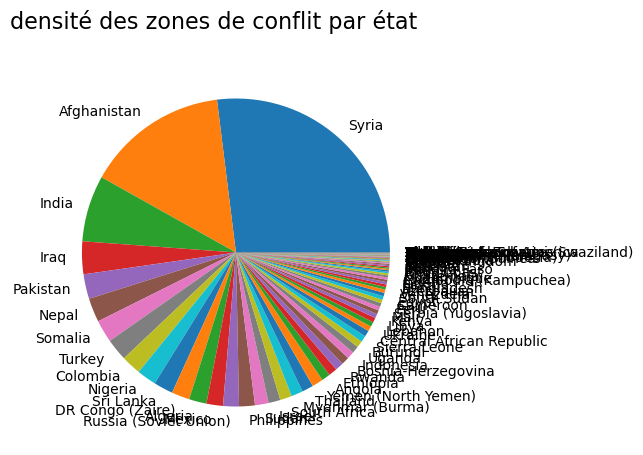

In [26]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
plt.suptitle(f'densité des zones de conflit par état ', fontsize=16)
ax1.pie(df_dataset.country.value_counts(),labels=df_dataset.country.value_counts().index)


In [166]:
df_string=df_dataset

In [154]:
series=df_dataset.year

In [173]:
df_string.year=df_string.year.map(str)

/tmp/ipykernel_29769/233830623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_string.year=df_string.year.map(str)


In [176]:
df_string.year[0]

'2017'

In [156]:
df_dataset.year.value_counts().index=df_dataset.year.value_counts().index.map(str)

In [144]:
df_dataset.year.value_counts().index

Index([2014, 2013, 2012, 2015, 2016, 2017, 2019, 2018, 2011, 2009, 2004, 2008,
       2010, 2002, 1994, 2007, 2005, 2006, 2000, 2003, 1993, 1999, 1995, 1992,
       1998, 2001, 1990, 1996, 1991, 1997, 1989],
      dtype='int64', name='year')

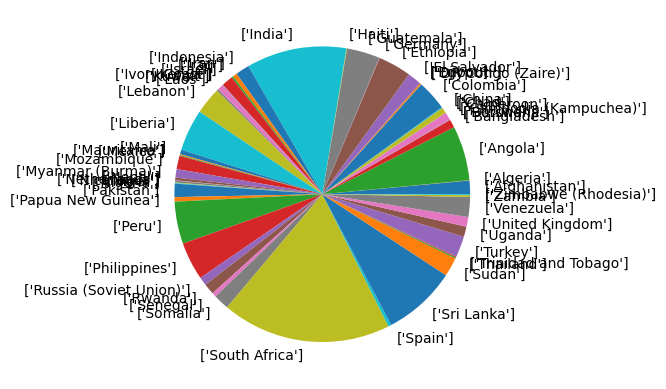

In [232]:
n_year='1990'
plt.pie(df_string.query("year== @n_year").groupby(["country"]).country.value_counts(), labels=df_string.query("year==@n_year").groupby(["country"]).country.unique())
plt.show()

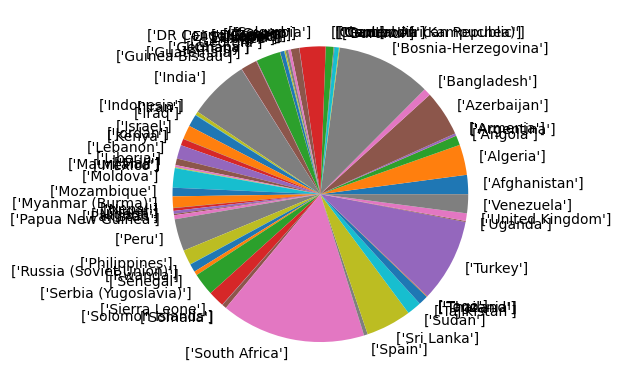

In [224]:
n_year='1992'
plt.pie(df_string.query("year== @n_year").groupby(["country"]).country.value_counts(), labels=df_string.query("year==@n_year").groupby(["country"]).country.unique())
plt.show()

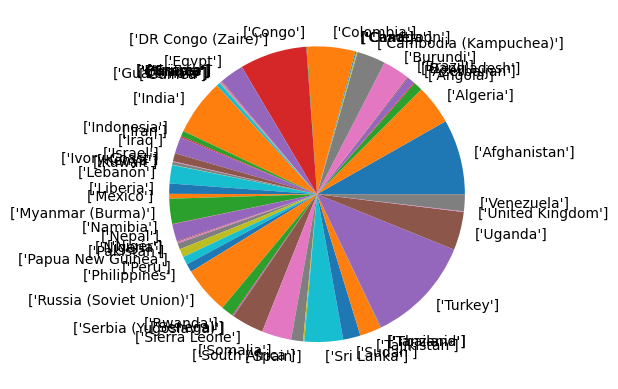

In [225]:
n_year='1996'
plt.pie(df_string.query("year== @n_year").groupby(["country"]).country.value_counts(), labels=df_string.query("year==@n_year").groupby(["country"]).country.unique())
plt.show()

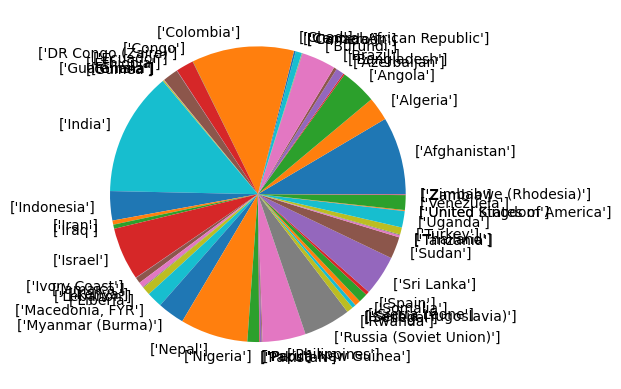

In [226]:
n_year='2001'
plt.pie(df_string.query("year== @n_year").groupby(["country"]).country.value_counts(), labels=df_string.query("year==@n_year").groupby(["country"]).country.unique())
plt.show()

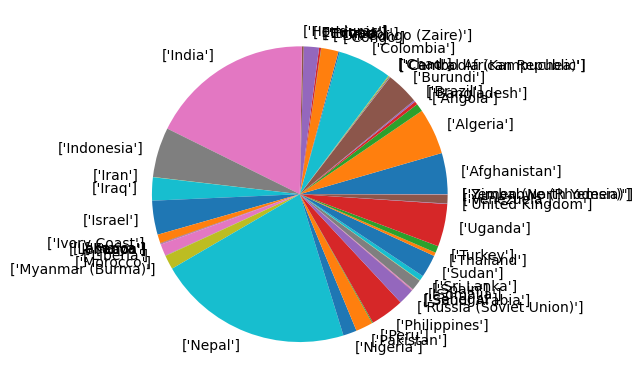

In [234]:
n_year='2003'
plt.pie(df_string.query("year== @n_year").groupby(["country"]).country.value_counts(), labels=df_string.query("year==@n_year").groupby(["country"]).country.unique())
plt.show()

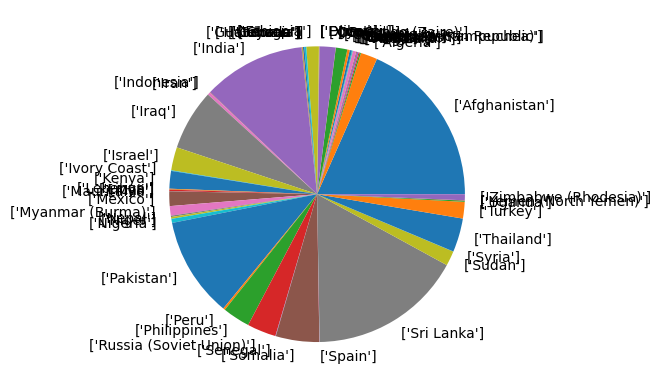

In [235]:
n_year='2008'
plt.pie(df_string.query("year== @n_year").groupby(["country"]).country.value_counts(), labels=df_string.query("year==@n_year").groupby(["country"]).country.unique())
plt.show()

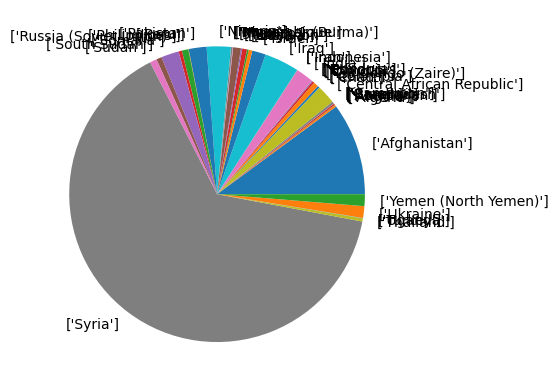

In [236]:
n_year='2014'
plt.pie(df_string.query("year== @n_year").groupby(["country"]).country.value_counts(), labels=df_string.query("year==@n_year").groupby(["country"]).country.unique())
plt.show()

In [237]:
df_dataset.describe()

,id,active_year,type_of_violence,conflict_dset_id,conflict_new_id,dyad_dset_id,dyad_new_id,side_a_dset_id,side_a_new_id,side_b_dset_id,...,country_id,event_clarity,date_prec,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low
count,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,...,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000,225385.000000
mean,177959.035965,0.963494,1.421896,2045.855084,2065.118770,4925.258766,5110.042150,362.018564,362.018564,3140.517661,...,617.806691,1.084784,1.256024,2.105016,2.656854,4.360237,2.177452,11.299559,18.331890,9.493977
std,97296.005526,0.187547,0.751061,4279.466053,4186.368474,5728.788672,5703.545386,1006.456067,1006.456067,3570.076833,...,161.684809,0.278560,0.709845,63.717796,32.812313,187.360638,124.964213,239.542891,397.427596,186.459217
min,4.000000,0.000000,1.000000,6.000000,205.000000,6.000000,406.000000,3.000000,3.000000,3.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93469.000000,1.000000,1.000000,299.000000,299.000000,658.000000,735.000000,118.000000,118.000000,303.000000,...,615.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,188695.000000,1.000000,1.000000,333.000000,337.000000,792.000000,955.000000,123.000000,123.000000,743.000000,...,652.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,2.000000
75%,262299.000000,1.000000,2.000000,400.000000,506.000000,11973.000000,11973.000000,146.000000,146.000000,4456.000000,...,700.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,5.000000,6.000000,5.000000
max,336238.000000,1.000000,3.000000,16331.000000,14973.000000,16331.000000,16331.000000,7676.000000,7676.000000,9999.000000,...,940.000000,2.000000,5.000000,14776.000000,9505.000000,40000.000000,48183.000000,48183.000000,75000.000000,48183.000000


In [238]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225385 entries, 0 to 225384
Data columns (total 39 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 225385 non-null  int64  
 1   relid              225385 non-null  object 
 2   year               225385 non-null  object 
 3   active_year        225385 non-null  int64  
 4   code_status        225385 non-null  object 
 5   type_of_violence   225385 non-null  int64  
 6   conflict_dset_id   225385 non-null  int64  
 7   conflict_new_id    225385 non-null  int64  
 8   conflict_name      225385 non-null  object 
 9   dyad_dset_id       225385 non-null  int64  
 10  dyad_new_id        225385 non-null  int64  
 11  dyad_name          225385 non-null  object 
 12  side_a_dset_id     225385 non-null  int64  
 13  side_a_new_id      225385 non-null  int64  
 14  side_a             225385 non-null  object 
 15  side_b_dset_id     225385 non-null  int64  
 16  si

In [242]:
df_dataset.head()

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,...,1,2017-07-31 00:00:00.000,2017-07-31 00:00:00.000,0,4,0,2,6,6,6
1,132140,AFG-1989-1-411-2,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,3,1989-01-07 00:00:00.000,1989-01-13 00:00:00.000,6,0,0,0,6,6,6
2,130364,AFG-1989-1-411-37,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,2,1989-01-15 00:00:00.000,1989-01-18 00:00:00.000,0,0,0,4,4,4,0
3,130359,AFG-1989-1-411-4,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,2,1989-01-23 00:00:00.000,1989-01-24 00:00:00.000,0,0,0,600,600,600,600
4,133883,AFG-1989-1-411-39,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,3,1989-01-30 00:00:00.000,1989-02-05 00:00:00.000,0,0,0,2,2,2,0


# ZONE d'EXPLOITATION DU DATASET
- une frappe pour un couple latitude longitude
- intensité du conflit nombre de décès
- intensité de la frappe de faible à forte
- suivre  le dataset en time series
- predire la probabilité d'une frappe et de son intensité sur quelle latitude longitude dans un laps de temps donné.